In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
import folium
import json
from glob import glob
import missingno as msno

In [2]:
# merge data 불러오기
df = pd.read_csv('./datas/industry_merged.csv', encoding='utf-8')

In [3]:
# Column 추가 : PER = 시총 / 당기순이익
df['PER'] = df['시총'] / df['당기순이익 (백만원)']

In [4]:
# Column명 변경 : 자기자본이익률 (%) -> ROE
df.rename(columns = {'자기자본이익률 (%)' : 'ROE'}, inplace = True)

In [5]:
# 2. 전체 산업분류 정규화
df_norm_std = pd.DataFrame()
for i in range(len(df['산업분류'].unique())):
    data = df[df['산업분류'] == df['산업분류'].unique()[i]][list(df.columns)[2:]]
    data_norm = (data - data.mean()) / data.std()
    df_norm_std_left = df[['산업분류', '년도']][df['산업분류']==df['산업분류'].unique()[i]]
    df_norm_std_ind = pd.concat([df_norm_std_left, data_norm], axis=1)
    df_norm_std = df_norm_std.append(df_norm_std_ind)
df_norm_std.head(2)

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),ROE,총자본경상이익률 (%),시장규모,시총,PER
0,건설업,2005,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363,0.252339
1,건설업,2006,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515,0.232899


In [6]:
# 정규화 확인(산업/data column별 평균 = 0 확인)

for i in range(len(df['산업분류'].unique())):
    for j in range(2, len(list(df.columns))):
        if int(df_norm_std[df['산업분류']==df['산업분류'].unique()[i]][list(df.columns)[j]].mean()) != 0:
            print('error')

In [7]:
df_norm_std.to_csv('./datas/norm_std.csv', index=False)

In [8]:
df_norm_std.head(2)

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),ROE,총자본경상이익률 (%),시장규모,시총,PER
0,건설업,2005,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363,0.252339
1,건설업,2006,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515,0.232899


In [9]:
df_q1 = df_norm_std[['산업분류', '년도', 'PER', 'ROE', '시총']][df['산업분류']==df['산업분류'].unique()[0]]
df_q1

,산업분류,년도,PER,ROE,시총
0,건설업,2005,0.252339,1.299236,-0.319363
1,건설업,2006,0.232899,1.501383,0.511515
2,건설업,2007,0.372727,1.041482,3.089481
3,건설업,2008,0.137126,0.834101,-0.789891
4,건설업,2009,0.340279,0.320557,0.348886
5,건설업,2010,-0.965475,-0.298968,0.704350
6,건설업,2011,-1.345803,-0.837372,-0.114567
7,건설업,2012,-0.694721,-1.779416,-0.275034
8,건설업,2013,-0.271269,-1.387552,-0.370730
9,건설업,2014,-0.164026,-0.885783,-0.684953


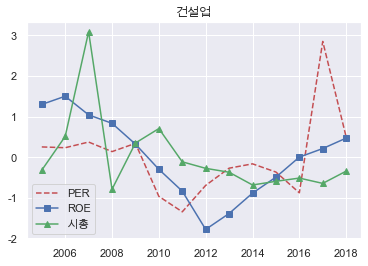

In [10]:
i = 0
df_question = df_norm_std[['산업분류', '년도', 'PER', 'ROE', '시총']][df['산업분류']==df['산업분류'].unique()[i]]
plt.plot(df_q1['년도'], df_q1['PER'], 'r--', 
         df_q1['년도'], df_q1['ROE'], 'bs-', 
         df_q1['년도'], df_q1['시총'], 'g^-')
plt.title('{}'.format(df['산업분류'].unique().tolist()[i]))
plt.legend(['PER', 'ROE', '시총'])
plt.show()

In [11]:
# PER 평균 이하 & ROE 평균 이상

df_show = pd.DataFrame(columns = ['산업분류', '년도', 'PER', 'ROE', '시총', '결정', '결과', '수익'])

for i in range(len(df['산업분류'].unique().tolist())):
    df_question = df_norm_std[['산업분류', '년도', 'PER', 'ROE', '시총']][df['산업분류']==df['산업분류'].unique()[i]]




    decision = []
    result = []
    for year in range(2005, 2018):
        if (df_question['PER'][df_question['년도']==year] <= 0).bool() and (df_question['ROE'][df_question['년도']==year] >= 0).bool():
            decision.append('Buy')
        elif (df_question['PER'][df_question['년도']==year] > 0).bool() and (df_question['ROE'][df_question['년도']==year] < 0).bool():
            decision.append('Sell')
        else:
            decision.append('Hold')
        
        if float(df_question['시총'][df_question['년도'] == year + 1]) > float(df_question['시총'][df_question['년도'] == year]):
            result.append('1년 뒤 상승')
        else:
            result.append('1년 뒤 하락')

    decision.append('-')
    result.append('-')

    df_question['결정'] = decision
    df_question['결과'] = result

    earning = []
    for year in range(2005, 2018):
        if (df_question['결정'][df_question['년도'] == year] == 'Buy').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 상승').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Sell').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 하락').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Hold').bool():
            earning.append(0)
        else:
            earning.append(-1)
    earning.append(0)
    df_question['수익'] = earning

    df_show = df_show.append(df_question)

df_show

,산업분류,년도,PER,ROE,시총,결정,결과,수익
0,건설업,2005,0.252339,1.299236,-0.319363,Hold,1년 뒤 상승,0
1,건설업,2006,0.232899,1.501383,0.511515,Hold,1년 뒤 상승,0
2,건설업,2007,0.372727,1.041482,3.089481,Hold,1년 뒤 하락,0
3,건설업,2008,0.137126,0.834101,-0.789891,Hold,1년 뒤 상승,0
4,건설업,2009,0.340279,0.320557,0.348886,Hold,1년 뒤 상승,0
...,...,...,...,...,...,...,...,...
289,제조업,2014,-0.204119,0.059944,0.270063,Buy,1년 뒤 상승,1
290,제조업,2015,0.656329,0.208005,0.520580,Hold,1년 뒤 상승,0
291,제조업,2016,1.238114,0.461301,0.932219,Hold,1년 뒤 상승,0
292,제조업,2017,1.492806,-0.056133,1.953584,Sell,1년 뒤 하락,1


In [12]:
(df_show['수익']==1).value_counts(), (df_show['수익']==-1).value_counts(),

(False    216
 True      78
 Name: 수익, dtype: int64,
 False    242
 True      52
 Name: 수익, dtype: int64)

In [13]:
for i in range(len(df_show['산업분류'].unique().tolist())):
    print(df_show['산업분류'].unique().tolist()[i], df_show['수익'][df_show['산업분류'] == df_show['산업분류'].unique().tolist()[i]].sum())


건설업 -1
광업 1
기계 -3
기타제조업 -1
농업, 임업 및 어업 -4
비금속광물 -1
서비스업 4
섬유의복 0
운수장비 0
운수창고업 2
유통업 5
음식료품 3
의료·정밀기기 1
의약품 7
전기가스 1
전기전자 2
종이·목재 -2
철강금속 3
통신업 4
화학 2
제조업 3


In [14]:
for i in range(len(df_show['년도'].unique().tolist())):
    print(df_show['년도'].unique().tolist()[i], df_show['수익'][df_show['년도'] == df_show['년도'].unique().tolist()[i]].sum())

2005 3
2006 1
2007 4
2008 0
2009 3
2010 5
2011 6
2012 -3
2013 -1
2014 0
2015 -1
2016 3
2017 6
2018 0


In [15]:
# PER 평균 이하 & ROE 15 이상

df_show_pr15 = pd.DataFrame(columns = ['산업분류', '년도', 'PER', 'ROE', '시총', '결정', '결과', '수익'])

for i in range(len(df['산업분류'].unique().tolist())):
    df_question = df_norm_std[['산업분류', '년도', 'PER', 'ROE', '시총']][df['산업분류']==df['산업분류'].unique()[i]]
    df_question['ROE'] = df['ROE'][df['산업분류']==df['산업분류'].unique()[i]]




    decision = []
    result = []
    for year in range(2005, 2018):
        if (df_question['PER'][df_question['년도']==year] <= 0).bool() and (df_question['ROE'][df_question['년도']==year] >= 15).bool():
            decision.append('Buy')
        elif (df_question['PER'][df_question['년도']==year] > 0).bool() and (df_question['ROE'][df_question['년도']==year] < 15).bool():
            decision.append('Sell')
        else:
            decision.append('Hold')
        
        if float(df_question['시총'][df_question['년도'] == year + 1]) > float(df_question['시총'][df_question['년도'] == year]):
            result.append('1년 뒤 상승')
        else:
            result.append('1년 뒤 하락')

    decision.append('-')
    result.append('-')

    df_question['결정'] = decision
    df_question['결과'] = result

    earning = []
    for year in range(2005, 2018):
        if (df_question['결정'][df_question['년도'] == year] == 'Buy').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 상승').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Sell').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 하락').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Hold').bool():
            earning.append(0)
        else:
            earning.append(-1)
    earning.append(0)
    df_question['수익'] = earning

    df_show_pr15 = df_show_pr15.append(df_question)

df_show_pr15

,산업분류,년도,PER,ROE,시총,결정,결과,수익
0,건설업,2005,0.252339,13.245000,-0.319363,Sell,1년 뒤 상승,-1
1,건설업,2006,0.232899,14.790000,0.511515,Sell,1년 뒤 상승,-1
2,건설업,2007,0.372727,11.275000,3.089481,Sell,1년 뒤 하락,1
3,건설업,2008,0.137126,9.690000,-0.789891,Sell,1년 뒤 상승,-1
4,건설업,2009,0.340279,5.765000,0.348886,Sell,1년 뒤 상승,-1
...,...,...,...,...,...,...,...,...
289,제조업,2014,-0.204119,4.212361,0.270063,Hold,1년 뒤 상승,0
290,제조업,2015,0.656329,4.475972,0.520580,Sell,1년 뒤 상승,-1
291,제조업,2016,1.238114,4.926944,0.932219,Sell,1년 뒤 상승,-1
292,제조업,2017,1.492806,4.005694,1.953584,Sell,1년 뒤 하락,1


In [16]:
(df_show_pr15['수익']==1).value_counts(), (df_show_pr15['수익']==-1).value_counts() 

(False    238
 True      56
 Name: 수익, dtype: int64,
 False    219
 True      75
 Name: 수익, dtype: int64)

In [17]:
for i in range(len(df_show_pr15['산업분류'].unique().tolist())):
    print(df_show_pr15['산업분류'].unique().tolist()[i], df_show_pr15['수익'][df_show_pr15['산업분류'] == df_show_pr15['산업분류'].unique().tolist()[i]].sum())


건설업 -4
광업 1
기계 -2
기타제조업 -3
농업, 임업 및 어업 -5
비금속광물 -3
서비스업 1
섬유의복 -3
운수장비 1
운수창고업 0
유통업 2
음식료품 -2
의료·정밀기기 -2
의약품 0
전기가스 0
전기전자 1
종이·목재 -5
철강금속 2
통신업 0
화학 1
제조업 1


In [18]:
for i in range(len(df_show_pr15['년도'].unique().tolist())):
    print(df_show_pr15['년도'].unique().tolist()[i], df_show_pr15['수익'][df_show_pr15['년도'] == df_show_pr15['년도'].unique().tolist()[i]].sum())

2005 -4
2006 -9
2007 12
2008 -6
2009 -7
2010 5
2011 -1
2012 -2
2013 -1
2014 -5
2015 -3
2016 -6
2017 8
2018 0


In [19]:
# PER 평균 이하

df_show_p = pd.DataFrame(columns = ['산업분류', '년도', 'PER', '시총', '결정', '결과', '수익'])

for i in range(len(df['산업분류'].unique().tolist())):
    df_question = df_norm_std[['산업분류', '년도', 'PER', '시총']][df['산업분류']==df['산업분류'].unique()[i]]




    decision = []
    result = []
    for year in range(2005, 2018):
        if (df_question['PER'][df_question['년도']==year] <= 0).bool():
            decision.append('Buy')
        else:
            decision.append('Sell')
      
        
        if float(df_question['시총'][df_question['년도'] == year + 1]) > float(df_question['시총'][df_question['년도'] == year]):
            result.append('1년 뒤 상승')
        else:
            result.append('1년 뒤 하락')

    decision.append('-')
    result.append('-')

    df_question['결정'] = decision
    df_question['결과'] = result

    earning = []
    for year in range(2005, 2018):
        if (df_question['결정'][df_question['년도'] == year] == 'Buy').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 상승').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Sell').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 하락').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Hold').bool():
            earning.append(0)
        else:
            earning.append(-1)
    earning.append(0)
    df_question['수익'] = earning

    df_show_p = df_show_p.append(df_question)

df_show_p

,산업분류,년도,PER,시총,결정,결과,수익
0,건설업,2005,0.252339,-0.319363,Sell,1년 뒤 상승,-1
1,건설업,2006,0.232899,0.511515,Sell,1년 뒤 상승,-1
2,건설업,2007,0.372727,3.089481,Sell,1년 뒤 하락,1
3,건설업,2008,0.137126,-0.789891,Sell,1년 뒤 상승,-1
4,건설업,2009,0.340279,0.348886,Sell,1년 뒤 상승,-1
...,...,...,...,...,...,...,...
289,제조업,2014,-0.204119,0.270063,Buy,1년 뒤 상승,1
290,제조업,2015,0.656329,0.520580,Sell,1년 뒤 상승,-1
291,제조업,2016,1.238114,0.932219,Sell,1년 뒤 상승,-1
292,제조업,2017,1.492806,1.953584,Sell,1년 뒤 하락,1


In [20]:
(df_show_p['수익']==1).value_counts(), (df_show_p['수익']==-1).value_counts() 

(False    148
 True     146
 Name: 수익, dtype: int64,
 False    167
 True     127
 Name: 수익, dtype: int64)

In [21]:
for i in range(len(df_show_p['산업분류'].unique().tolist())):
    print(df_show_p['산업분류'].unique().tolist()[i], df_show_p['수익'][df_show_p['산업분류'] == df_show_p['산업분류'].unique().tolist()[i]].sum())


건설업 -7
광업 1
기계 -1
기타제조업 -3
농업, 임업 및 어업 -7
비금속광물 -1
서비스업 7
섬유의복 -3
운수장비 1
운수창고업 1
유통업 7
음식료품 3
의료·정밀기기 3
의약품 9
전기가스 1
전기전자 3
종이·목재 -7
철강금속 1
통신업 5
화학 3
제조업 3


In [22]:
for i in range(len(df_show_p['년도'].unique().tolist())):
    print(df_show_p['년도'].unique().tolist()[i], df_show_p['수익'][df_show_p['년도'] == df_show_p['년도'].unique().tolist()[i]].sum())

2005 1
2006 3
2007 3
2008 5
2009 1
2010 5
2011 1
2012 -1
2013 3
2014 -1
2015 -1
2016 -3
2017 3
2018 0


In [23]:
# ROE 15 이상

df_show_r15 = pd.DataFrame(columns = ['산업분류', '년도', 'ROE', '시총', '결정', '결과', '수익'])

for i in range(len(df['산업분류'].unique().tolist())):
    df_question = df_norm_std[['산업분류', '년도', 'ROE', '시총']][df['산업분류']==df['산업분류'].unique()[i]]
    df_question['ROE'] = df['ROE'][df['산업분류']==df['산업분류'].unique()[i]]




    decision = []
    result = []
    for year in range(2005, 2018):
        if (df_question['ROE'][df_question['년도']==year] >= 15).bool():
            decision.append('Buy')
        else:
            decision.append('Sell')

        
        if float(df_question['시총'][df_question['년도'] == year + 1]) > float(df_question['시총'][df_question['년도'] == year]):
            result.append('1년 뒤 상승')
        else:
            result.append('1년 뒤 하락')

    decision.append('-')
    result.append('-')

    df_question['결정'] = decision
    df_question['결과'] = result

    earning = []
    for year in range(2005, 2018):
        if (df_question['결정'][df_question['년도'] == year] == 'Buy').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 상승').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Sell').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 하락').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Hold').bool():
            earning.append(0)
        else:
            earning.append(-1)
    earning.append(0)
    df_question['수익'] = earning

    df_show_r15 = df_show_r15.append(df_question)

df_show_r15

,산업분류,년도,ROE,시총,결정,결과,수익
0,건설업,2005,13.245000,-0.319363,Sell,1년 뒤 상승,-1
1,건설업,2006,14.790000,0.511515,Sell,1년 뒤 상승,-1
2,건설업,2007,11.275000,3.089481,Sell,1년 뒤 하락,1
3,건설업,2008,9.690000,-0.789891,Sell,1년 뒤 상승,-1
4,건설업,2009,5.765000,0.348886,Sell,1년 뒤 상승,-1
...,...,...,...,...,...,...,...
289,제조업,2014,4.212361,0.270063,Sell,1년 뒤 상승,-1
290,제조업,2015,4.475972,0.520580,Sell,1년 뒤 상승,-1
291,제조업,2016,4.926944,0.932219,Sell,1년 뒤 상승,-1
292,제조업,2017,4.005694,1.953584,Sell,1년 뒤 하락,1


In [24]:
(df_show_r15['수익']==1).value_counts(), (df_show_r15['수익']==-1).value_counts() 

(False    186
 True     108
 Name: 수익, dtype: int64,
 True     165
 False    129
 Name: 수익, dtype: int64)

In [25]:
for i in range(len(df_show_r15['산업분류'].unique().tolist())):
    print(df_show_r15['산업분류'].unique().tolist()[i], df_show_r15['수익'][df_show_r15['산업분류'] == df_show_r15['산업분류'].unique().tolist()[i]].sum())


건설업 -1
광업 1
기계 -3
기타제조업 -3
농업, 임업 및 어업 -3
비금속광물 -5
서비스업 -5
섬유의복 -3
운수장비 1
운수창고업 -1
유통업 -3
음식료품 -7
의료·정밀기기 -7
의약품 -9
전기가스 -1
전기전자 -1
종이·목재 -3
철강금속 3
통신업 -5
화학 -1
제조업 -1


In [26]:
for i in range(len(df_show_r15['년도'].unique().tolist())):
    print(df_show_r15['년도'].unique().tolist()[i], df_show_r15['수익'][df_show_r15['년도'] == df_show_r15['년도'].unique().tolist()[i]].sum())

2005 -9
2006 -21
2007 21
2008 -17
2009 -15
2010 5
2011 -3
2012 -3
2013 -5
2014 -9
2015 -5
2016 -9
2017 13
2018 0


In [27]:
# ROE 평균 이상

df_show_r = pd.DataFrame(columns = ['산업분류', '년도', 'ROE', '시총', '결정', '결과', '수익'])

for i in range(len(df['산업분류'].unique().tolist())):
    df_question = df_norm_std[['산업분류', '년도', 'ROE', '시총']][df['산업분류']==df['산업분류'].unique()[i]]




    decision = []
    result = []
    for year in range(2005, 2018):
        if (df_question['ROE'][df_question['년도']==year] >= 0).bool():
            decision.append('Buy')
        else:
            decision.append('Sell')

        
        if float(df_question['시총'][df_question['년도'] == year + 1]) > float(df_question['시총'][df_question['년도'] == year]):
            result.append('1년 뒤 상승')
        else:
            result.append('1년 뒤 하락')

    decision.append('-')
    result.append('-')

    df_question['결정'] = decision
    df_question['결과'] = result

    earning = []
    for year in range(2005, 2018):
        if (df_question['결정'][df_question['년도'] == year] == 'Buy').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 상승').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Sell').bool() and (df_question['결과'][df_question['년도'] == year] == '1년 뒤 하락').bool():
            earning.append(1)
        elif (df_question['결정'][df_question['년도'] == year] == 'Hold').bool():
            earning.append(0)
        else:
            earning.append(-1)
    earning.append(0)
    df_question['수익'] = earning

    df_show_r = df_show_r.append(df_question)

df_show_r

,산업분류,년도,ROE,시총,결정,결과,수익
0,건설업,2005,1.299236,-0.319363,Buy,1년 뒤 상승,1
1,건설업,2006,1.501383,0.511515,Buy,1년 뒤 상승,1
2,건설업,2007,1.041482,3.089481,Buy,1년 뒤 하락,-1
3,건설업,2008,0.834101,-0.789891,Buy,1년 뒤 상승,1
4,건설업,2009,0.320557,0.348886,Buy,1년 뒤 상승,1
...,...,...,...,...,...,...,...
289,제조업,2014,0.059944,0.270063,Buy,1년 뒤 상승,1
290,제조업,2015,0.208005,0.520580,Buy,1년 뒤 상승,1
291,제조업,2016,0.461301,0.932219,Buy,1년 뒤 상승,1
292,제조업,2017,-0.056133,1.953584,Sell,1년 뒤 하락,1


In [28]:
(df_show_r['수익']==1).value_counts(), (df_show_r['수익']==-1).value_counts() 

(True     153
 False    141
 Name: 수익, dtype: int64,
 False    174
 True     120
 Name: 수익, dtype: int64)

In [29]:
for i in range(len(df_show_r['산업분류'].unique().tolist())):
    print(df_show_r['산업분류'].unique().tolist()[i], df_show_r['수익'][df_show_r['산업분류'] == df_show_r['산업분류'].unique().tolist()[i]].sum())


건설업 5
광업 1
기계 -5
기타제조업 1
농업, 임업 및 어업 -1
비금속광물 -1
서비스업 1
섬유의복 3
운수장비 -1
운수창고업 3
유통업 3
음식료품 3
의료·정밀기기 -1
의약품 5
전기가스 1
전기전자 1
종이·목재 3
철강금속 5
통신업 3
화학 1
제조업 3


In [30]:
for i in range(len(df_show_r['년도'].unique().tolist())):
    print(df_show_r['년도'].unique().tolist()[i], df_show_r['수익'][df_show_r['년도'] == df_show_r['년도'].unique().tolist()[i]].sum())

2005 5
2006 -1
2007 5
2008 -5
2009 5
2010 5
2011 11
2012 -5
2013 -5
2014 1
2015 -1
2016 9
2017 9
2018 0


In [61]:
# 데이터 합치기 : 승률

win_pr = round((df_show['수익']==1).sum() / ((df_show['수익']==1).sum() +  (df_show['수익']==-1).sum()), 2)
win_pr15 = round((df_show_pr15['수익']==1).sum() / ((df_show_pr15['수익']==1).sum() +  (df_show_pr15['수익']==-1).sum()), 2)
win_p = round((df_show_p['수익']==1).sum() / ((df_show_p['수익']==1).sum() +  (df_show_p['수익']==-1).sum()), 2)
win_r15 = round((df_show_r15['수익']==1).sum() / ((df_show_r15['수익']==1).sum() +  (df_show_r15['수익']==-1).sum()), 2)
win_r = round((df_show_r['수익']==1).sum() / ((df_show_r['수익']==1).sum() +  (df_show_r['수익']==-1).sum()), 2)

[win_pr, win_pr15, win_p, win_r15, win_r]

[0.6, 0.43, 0.53, 0.4, 0.56]

In [75]:
df_win = pd.DataFrame(columns=['PER 평균 이하 & ROE 평균 이상', 'PER 평균 이하 & ROE 15 이상', 'PER 평균 이하', 'ROE 15 이상', 'ROE 평균 이상'], index=['승률'], data=[[win_pr, win_pr15, win_p, win_r15, win_r]])
df_win['Avg'] = df_win.mean(axis=1)
df_win

,PER 평균 이하 & ROE 평균 이상,PER 평균 이하 & ROE 15 이상,PER 평균 이하,ROE 15 이상,ROE 평균 이상,Avg
승률,0.6,0.43,0.53,0.4,0.56,0.504


In [79]:
# 데이터 합치기 - 산업별
idx_ind = df_show['산업분류'].unique().tolist()
ls_pr, ls_pr15, ls_p, ls_r15, ls_r = [], [], [], [], []
for i in range(len(df_show['산업분류'].unique().tolist())):
    ls_pr.append(df_show['수익'][df_show['산업분류'] == df_show['산업분류'].unique().tolist()[i]].sum())
    ls_pr15.append(df_show_pr15['수익'][df_show['산업분류'] == df_show['산업분류'].unique().tolist()[i]].sum())
    ls_p.append(df_show_p['수익'][df_show['산업분류'] == df_show['산업분류'].unique().tolist()[i]].sum())
    ls_r15.append(df_show_r15['수익'][df_show['산업분류'] == df_show['산업분류'].unique().tolist()[i]].sum())
    ls_r.append(df_show_r['수익'][df_show['산업분류'] == df_show['산업분류'].unique().tolist()[i]].sum())

In [80]:
df_ind = pd.DataFrame(
    columns=['PER 평균 이하 & ROE 평균 이상', 'PER 평균 이하 & ROE 15 이상', 'PER 평균 이하', 'ROE 15 이상', 'ROE 평균 이상'], 
    index=[idx_ind])
df_ind['PER 평균 이하 & ROE 평균 이상'] = ls_pr
df_ind['PER 평균 이하 & ROE 15 이상'] = ls_pr15
df_ind['PER 평균 이하'] = ls_p
df_ind['ROE 15 이상'] = ls_r15
df_ind['ROE 평균 이상'] = ls_r


df_ind['Total'] = df_ind.sum(axis=1, numeric_only=True)
df_ind_tp = df_ind.transpose()
df_ind_tp['Total'] = df_ind_tp.sum(axis=1, numeric_only=True)
df_ind = df_ind_tp.transpose()
df_ind

,PER 평균 이하 & ROE 평균 이상,PER 평균 이하 & ROE 15 이상,PER 평균 이하,ROE 15 이상,ROE 평균 이상,Total
건설업,-1,-4,-7,-1,5,-8
광업,1,1,1,1,1,5
기계,-3,-2,-1,-3,-5,-14
기타제조업,-1,-3,-3,-3,1,-9
"농업, 임업 및 어업",-4,-5,-7,-3,-1,-20
비금속광물,-1,-3,-1,-5,-1,-11
서비스업,4,1,7,-5,1,8
섬유의복,0,-3,-3,-3,3,-6
운수장비,0,1,1,1,-1,2
운수창고업,2,0,1,-1,3,5


In [81]:
# 데이터 합치기 - 연도별
idx_year = df_show['년도'].unique().tolist()
ls_pr, ls_pr15, ls_p, ls_r15, ls_r = [], [], [], [], []
for i in range(len(df_show['년도'].unique().tolist())):
    ls_pr.append(df_show['수익'][df_show['년도'] == df_show['년도'].unique().tolist()[i]].sum())
    ls_pr15.append(df_show_pr15['수익'][df_show['년도'] == df_show['년도'].unique().tolist()[i]].sum())
    ls_p.append(df_show_p['수익'][df_show['년도'] == df_show['년도'].unique().tolist()[i]].sum())
    ls_r15.append(df_show_r15['수익'][df_show['년도'] == df_show['년도'].unique().tolist()[i]].sum())
    ls_r.append(df_show_r['수익'][df_show['년도'] == df_show['년도'].unique().tolist()[i]].sum())

In [82]:
df_year = pd.DataFrame(
    columns=['PER 평균 이하 & ROE 평균 이상', 'PER 평균 이하 & ROE 15 이상', 'PER 평균 이하', 'ROE 15 이상', 'ROE 평균 이상'], 
    index=[idx_year])
df_year['PER 평균 이하 & ROE 평균 이상'] = ls_pr
df_year['PER 평균 이하 & ROE 15 이상'] = ls_pr15
df_year['PER 평균 이하'] = ls_p
df_year['ROE 15 이상'] = ls_r15
df_year ['ROE 평균 이상'] = ls_r

df_year['Total'] = df_year.sum(axis=1, numeric_only=True)
df_year_tp = df_year.transpose()
df_year_tp['Total'] = df_year_tp.sum(axis=1, numeric_only=True)
df_year = df_year_tp.transpose()

df_year

,PER 평균 이하 & ROE 평균 이상,PER 평균 이하 & ROE 15 이상,PER 평균 이하,ROE 15 이상,ROE 평균 이상,Total
2005,3,-4,1,-9,5,-4
2006,1,-9,3,-21,-1,-27
2007,4,12,3,21,5,45
2008,0,-6,5,-17,-5,-23
2009,3,-7,1,-15,5,-13
2010,5,5,5,5,5,25
2011,6,-1,1,-3,11,14
2012,-3,-2,-1,-3,-5,-14
2013,-1,-1,3,-5,-5,-9
2014,0,-5,-1,-9,1,-14


<AxesSubplot:>

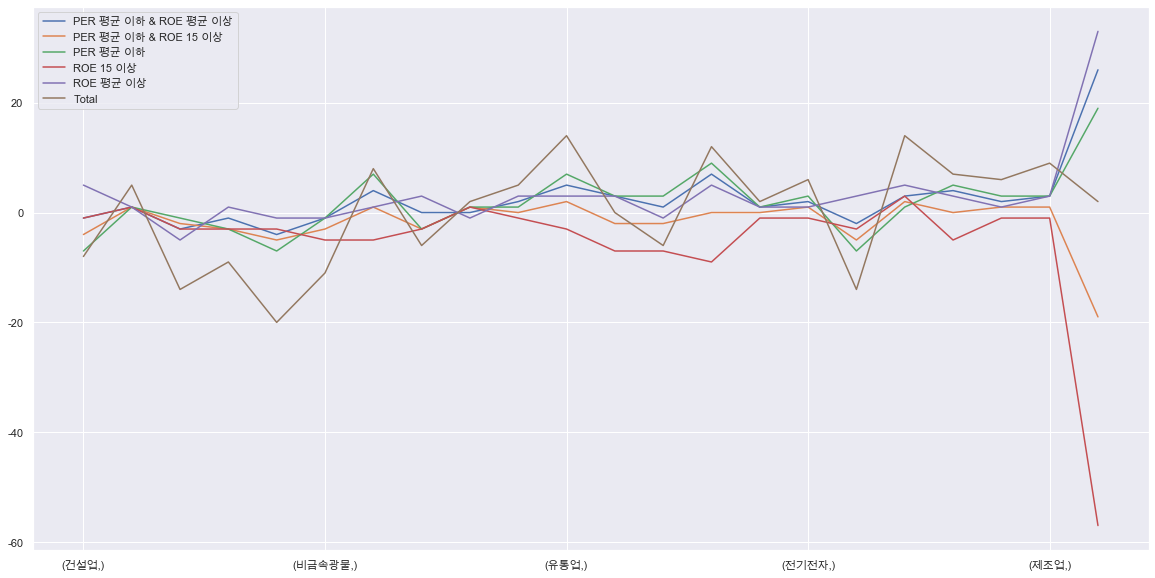

In [41]:
df_ind.plot(figsize=(20,10))

<AxesSubplot:>

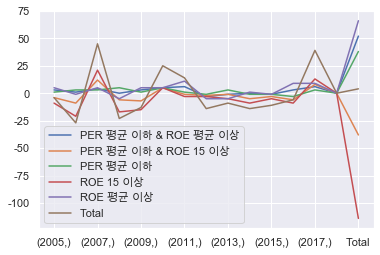

In [42]:
df_year.plot()

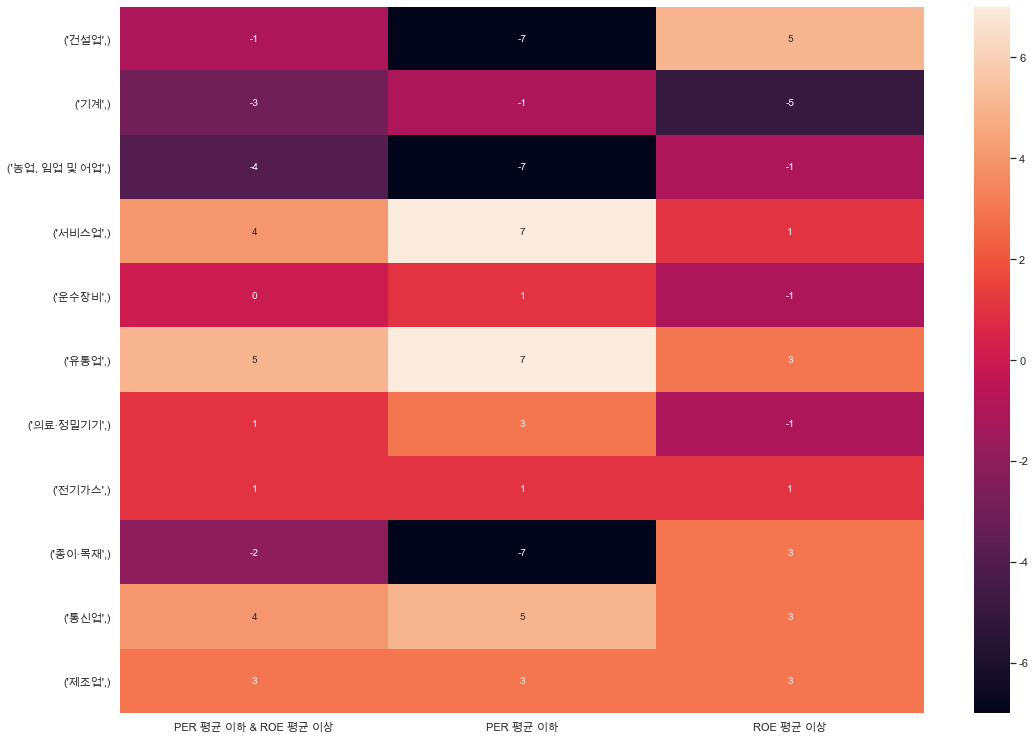

In [43]:
plt.figure(figsize=(18,13))
sns.heatmap(df_ind.iloc[:-1:2,:-1:2], annot=True, fmt="d")
plt.show()

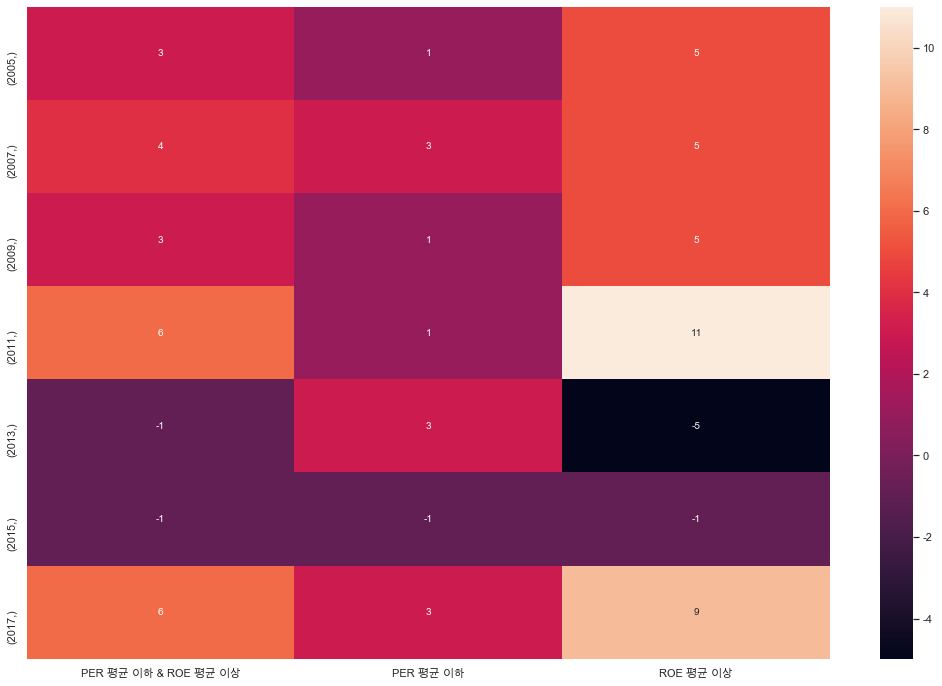

In [44]:
plt.figure(figsize=(18,12))
fig = sns.heatmap(df_year.iloc[:-1:2,:-1:2], annot=True, fmt="d")
plt.show()

<AxesSubplot:>

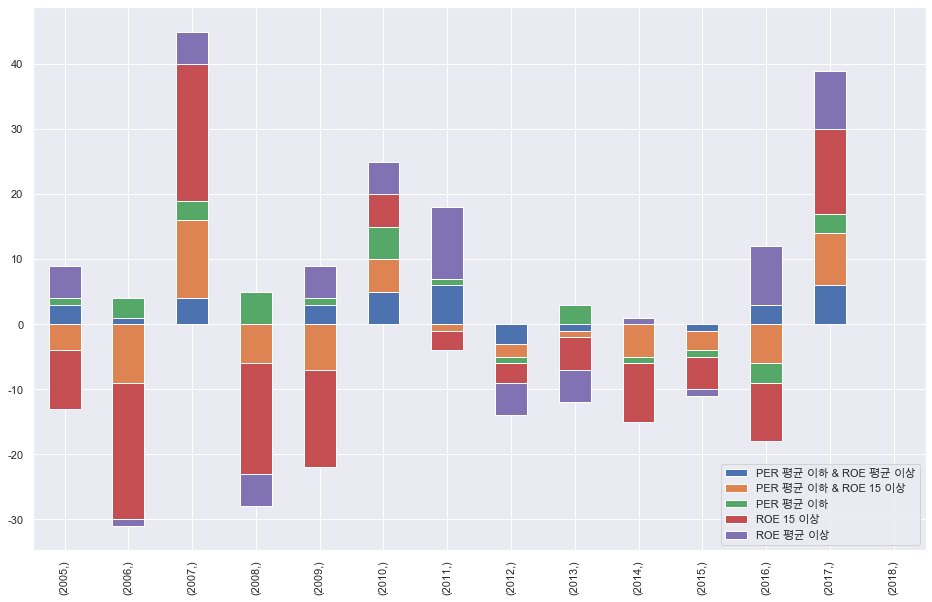

In [45]:
df_year.iloc[:-1,:-1].plot(kind="bar", stacked=True, figsize=(16,10))

<AxesSubplot:>

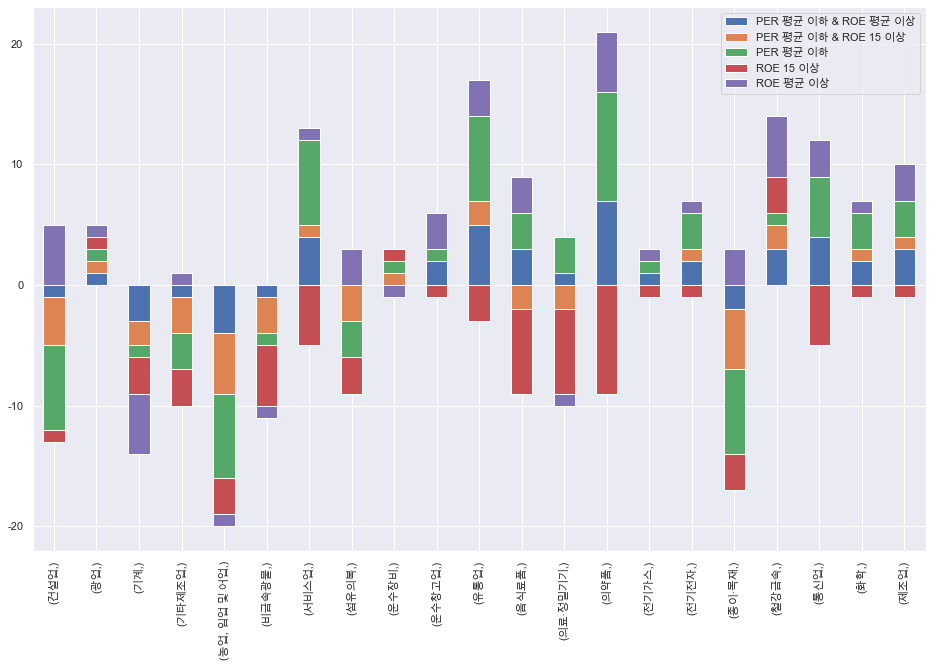

In [46]:
df_ind.iloc[:-1,:-1].plot(kind="bar", stacked=True, figsize=(16,10))

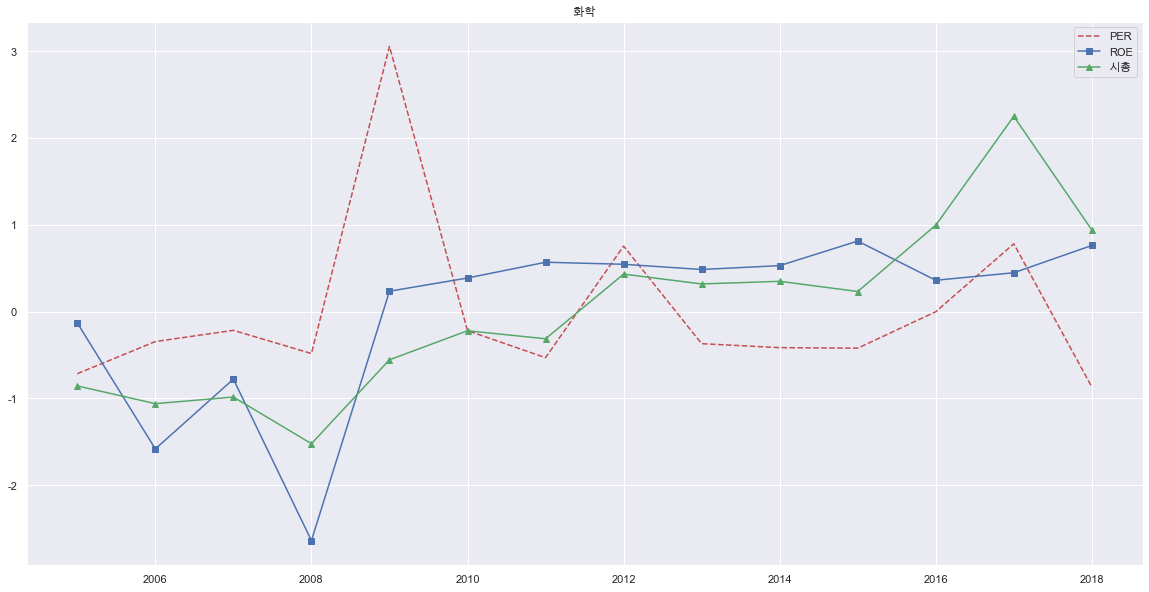

In [47]:
df_show_ex = df_show.loc[df_show['산업분류']=='전기전자']
plt.figure(figsize=(20,10))
plt.plot(df_show_ex['년도'], df_show_ex['PER'], 'r--', 
         df_show_ex['년도'], df_show_ex['ROE'], 'bs-', 
         df_show_ex['년도'], df_show_ex['시총'], 'g^-')
plt.title('화학')
plt.legend(['PER', 'ROE', '시총'])
plt.show()